<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Sbu-logo.svg/1200px-Sbu-logo.svg.png" alt="keras" width="150" height="150">

<h1 align=center><font size = 7>NLP Summer School</font></h1>
<h1 align=center><font size = 6>NLP Research Lab</font></h1>
<h1 align=center><font size = 5>Shahid Beheshti University</font></h1>
<h1 align=center><font size = 4> July 2022 </font></h1>

<a id=section1></a>

### Original Repo:

In [ ]:
'''
RNN_vs_LSTM_vs_GRU:
هر کدام از مدل ها به چند لایه (استکد) بروزرسانی شوند - دراپ اوت، دنس لیر و ... اضافه بشود در صورت لزوم (15)
دقت به بیش از 92 درصد برسد روی داده تست (15)
'''

In [1]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
# If current version of numpy gives an error while running the dataset below, then run this cell.
# Otherwise skip this cell.

!pip install numpy==1.14.2

# Restart the session after installing and don't run this cell again after restarting the session

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 7.1 MB/s 
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  ERROR: Failed cleaning build dir for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
    Running setup.py install for numpy ... error
  Rolling back uninstall of numpy
  Moving to /usr/bin/f2py
   from /tmp/pip-uninstall-zo_42kql/f2py
  Moving to /usr/local/bin/f2py
   from /tmp/pip-uninstall-vmdrmw7s/f2py
  Moving to /usr/local/bin/f2py3
   from /tmp/pip-uninstall-vmdrmw7s/f2py3
  Moving to /usr/local/bin/f2py3.7
   from /tmp/pip-uninstall-vmdrmw7s/f2py3.7
  Moving to /usr/local/lib/python3.7/dist-packages/numpy-1.21.6.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~umpy-1.21.6.dist-info
  Moving to /usr/local/lib/p

In [4]:
from tensorflow.keras.datasets import imdb
max_features = 10000
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
print('1st review in training data:\n')
print(input_train[0])

1st review in training data:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print('Sentiment of 1st review in training data:\n')
print(y_train[0])

Sentiment of 1st review in training data:

1


In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in input_train[0]])
print('1st review in training data actually looks like:\n')
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
1st review in training data actually looks like:

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big prof

In [8]:
from tensorflow.keras.preprocessing import sequence
maxlen = 500
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
max_features

10000

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, SimpleRNN
model = Sequential()
# add some extra layer
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
%%time
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 77s 464ms/step - loss: 0.6331 - acc: 0.6221 - val_loss: 0.5360 - val_acc: 0.7270
Epoch 2/10
157/157 [==============================] - 75s 476ms/step - loss: 0.4075 - acc: 0.8232 - val_loss: 0.4074 - val_acc: 0.8196
Epoch 3/10
157/157 [==============================] - 75s 477ms/step - loss: 0.3033 - acc: 0.8781 - val_loss: 0.3713 - val_acc: 0.8500
Epoch 4/10
157/157 [==============================] - 77s 492ms/step - loss: 0.2207 - acc: 0.9153 - val_loss: 0.3795 - val_acc: 0.8576
Epoch 5/10
157/157 [==============================] - 73s 466ms/step - loss: 0.1658 - acc: 0.9396 - val_loss: 0.4162 - val_acc: 0.8348
Epoch 6/10
157/157 [==============================] - 73s 464ms/step - loss: 0.1203 - acc: 0.9589 - val_loss: 0.5767 - val_acc: 0.8186
Epoch 7/10
157/157 [==============================] - 73s 468ms/step - loss: 0.0801 - acc: 0.9736 - val_loss: 0.8167 - val_acc: 0.7036
Epoch 8/10
157/157 [==============================] - 7

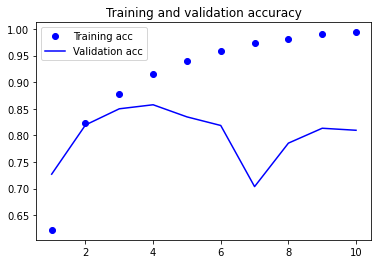

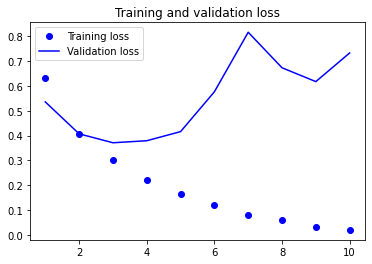

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [ ]:
%%time
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 24ms/step - loss: 0.5401 - acc: 0.7378 - val_loss: 0.3629 - val_acc: 0.8536
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.3164 - acc: 0.8735 - val_loss: 0.3475 - val_acc: 0.8538
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2439 - acc: 0.9057 - val_loss: 0.2780 - val_acc: 0.8892
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2092 - acc: 0.9216 - val_loss: 0.2837 - val_acc: 0.8852
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1847 - acc: 0.9320 - val_loss: 0.3690 - val_acc: 0.8844
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1668 - acc: 0.9390 - val_loss: 0.3339 - val_acc: 0.8826
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1473 - acc: 0.9493 - val_loss: 0.3928 - val_acc: 0.8632
Epoch 8/10
157/157 [==============================] - 3s 20ms/step - 

<a id=section7></a>

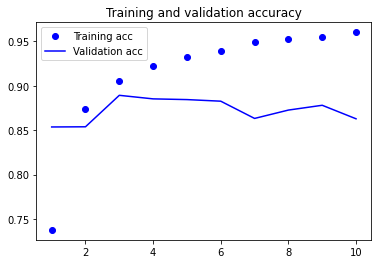

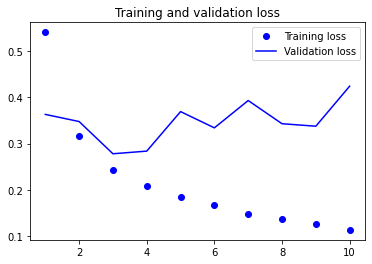

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [ ]:
%%time
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 48ms/step - loss: 0.5630 - acc: 0.7107 - val_loss: 0.4161 - val_acc: 0.8066
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3348 - acc: 0.8585 - val_loss: 0.3824 - val_acc: 0.8314
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2661 - acc: 0.8965 - val_loss: 0.3284 - val_acc: 0.8652
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2226 - acc: 0.9154 - val_loss: 0.3583 - val_acc: 0.8440
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1978 - acc: 0.9254 - val_loss: 0.3286 - val_acc: 0.8678
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1818 - acc: 0.9335 - val_loss: 0.3215 - val_acc: 0.8782
Epoch 7/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1618 - acc: 0.9413 - val_loss: 0.5451 - val_acc: 0.8372
Epoch 8/10
157/157 [==============================] - 4s 24ms/step - 

<a id=section9></a>

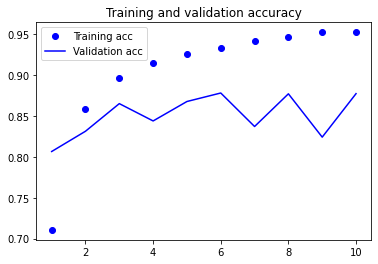

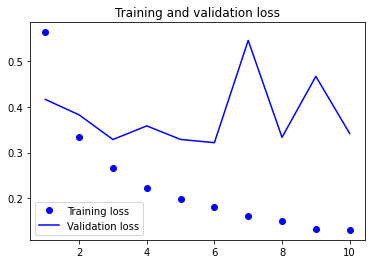

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

| Model | CPU Time for 10 Epochs(Google Colab) | Loss on Training Data | Loss on Validation Data | Accuracy on Training Data | Accuracy on Validation Data | 
| --- | --- | --- | --- | --- | --- |
| SimpleRNN Model | 6 Minutes | 0.2971 | 0.3501 | 0.8814 | 0.8610 |
| LSTM Model | 23 Minutes | 0.1928 | 0.3066 | 0.9279 | 0.8940 |
| GRU Model | 18 Minues | 0.1640 | 0.3279 | 0.9410 | 0.8796 |

what happens if do so with multi-layer ones?